# Salary Predictions Based on Job Descriptions

The purpose of this project is to make accurate salary preditctions that are based on existing known salaries so the company is able to recruit and retain top talent. This model will help the company for offering competetive pay to existing and future employees while also keeping payroll expenses in check. 

Data transformation and machine learning will be used to create a model that will predict a salary when given years of experience, job type, college degree, college major, industry, and miles from a metropolis.

The data for this model is relatively simplified as it has very few missing areas. The raw data consists of a training dataset with the features listed above and their corresponding salaries. Twenty percent of this training dataset was split into a test dataset with corresponding salaries so accuracy and error of the model can be determined.There is also a testing dataset that does not have any salary information available and will be used as a substitute for real-world data to use the model to predict salaries. 

__The features in this data set are described as below:__

__Years Experience__: How many years of experience <br>
__Job Type__: The position held (CEO, CFO, CTO, Vice President, Manager, Janitor, and senior or junior position)<br>
__College Degree__: Doctoral, Masters, Bachelors, High School, or None<br>
__College Major__: Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None<br>
__Industry__: Auto, Education, Finance, Health, Oil, Service, or Web<br>
__Miles From Metropolis__: How many miles away from a major city<br>

In [1]:
__author__ = "Shreyash Patra"
__email__ = "shreyashpatrads@gmail.com"

In [1]:
#Imported the required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import percentile

#For Label Encoding
from sklearn.preprocessing import LabelEncoder

#For Normalization
from sklearn.preprocessing import MinMaxScaler

#For Linear Regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#For Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# For Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

# For Random Forest and Gradient Boosting Regression model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For calculating the Cross Validation Score
from sklearn.model_selection import cross_val_score

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# DISCOVER

In [2]:
# Load the data into a Pandas dataframe and show the information
# Read in files and print the information
#SALARY_PATH = os.path.join("data")

#def load_housing_data(salary_path=SALARY_PATH):
#   csv_path = os.path.join(salary_path, 'housing.csv')
#    return pd.read_csv(csv_path)

train_feature_df = pd.read_csv('data/train_features.csv')
test_feature_df = pd.read_csv('data/test_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')

In [3]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_feature_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yearsExperience,1000000.0,11.992386,7.212391,0.0,6.0,12.0,18.0,24.0
milesFromMetropolis,1000000.0,49.529260,28.877733,0.0,25.0,50.0,75.0,99.0


In [10]:
# Finding numeric columns
numeric_cols = [col for col in train_feature_df.columns if train_feature_df[col].dtype == 'int64']
numeric_cols

['yearsExperience', 'milesFromMetropolis']

In [11]:
# Finding categorical columns
categorical_cols = [col for col in train_feature_df.columns if train_feature_df[col].dtype == 'object']
categorical_cols

['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [12]:
train_feature_df.describe(include='O').transpose()

,count,unique,top,freq
jobId,1000000,1000000,JOB1362684407687,1
companyId,1000000,63,COMP39,16193
jobType,1000000,8,SENIOR,125886
degree,1000000,5,HIGH_SCHOOL,236976
major,1000000,9,NONE,532355
industry,1000000,7,WEB,143206


### For the `categorical` features:

We can see that there's `63` Companies. The most frequent Company is `COMP39`, `8` types of job, most frequent position is `SENIOR` level, `5` types of education degree, the most frequent is `HIGH_SCHOOL`, and `9` types of degree major, the most frequent is `NONE` which mean maybe the individual forgot what major they are studied, but we assume that the individual wasn't willing to provide. What's more that there are `7` types of Industries, the most frequent is `WEB` industry. 

In [13]:
# Merge the features and salaries on jobId
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [14]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [15]:
# Statistical summary of columns
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [16]:
# Dropping the frames as the're no longer in use

del(train_feature_df)
del(train_target_df)

# CLEAN THE DATA

Looking for duplicate data,invalid data(salaries <= 0) or corruted data

In [17]:
# Checking for duplicates
train_df.duplicated().sum()

0

In [18]:
# Checking for duplicates
test_feature_df.duplicated().sum()

0

In [19]:
# Checking for missing values if any
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [20]:
# Checking for missing values if any
test_feature_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [21]:
# Checked for missing data using value-counts function
missing_data = train_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

jobId
False    1000000
Name: jobId, dtype: int64

companyId
False    1000000
Name: companyId, dtype: int64

jobType
False    1000000
Name: jobType, dtype: int64

degree
False    1000000
Name: degree, dtype: int64

major
False    1000000
Name: major, dtype: int64

industry
False    1000000
Name: industry, dtype: int64

yearsExperience
False    1000000
Name: yearsExperience, dtype: int64

milesFromMetropolis
False    1000000
Name: milesFromMetropolis, dtype: int64

salary
False    1000000
Name: salary, dtype: int64



In [22]:
# Checking for invalid Data in the columns
sal_incrr=train_df.index[train_df['salary']==0].to_list()
sal_incrr

[30559, 495984, 652076, 816129, 828156]

We found that there was some invalid data in salary column.

In [23]:
# Replaced the columns having invalid Data with the mean salary for the respective job type
grp = train_df.groupby('jobType')   
grp['salary'].agg([np.mean])

i=0
len_sal=len(sal_incrr)
while i < len_sal:
    str_job=train_df.loc[sal_incrr[i],'jobType']
    sal=round(grp.get_group(str_job)['salary'].mean())
    train_df.loc[sal_incrr[i],'salary']=sal
    i += 1

In [24]:
# Replaced the invalid data and checked again if any invalid data is present
sal_incrr1=train_df.index[train_df['salary']==0].to_list()
sal_incrr1

[]

We have prepared and cleaned the data for further analysis. The final data is stored in the "Train_Data" csv file.

### ---- 4 Explore the data (EDA) ----

Preliminary step in Data Analysis :-

     1) We need to summarize the main characteristics of data
     2) Understand the data
     3) Check for relationships betweens the feature variables present in the data
     

In [25]:
# check the dataset
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [26]:
train_df.shape

(1000000, 9)

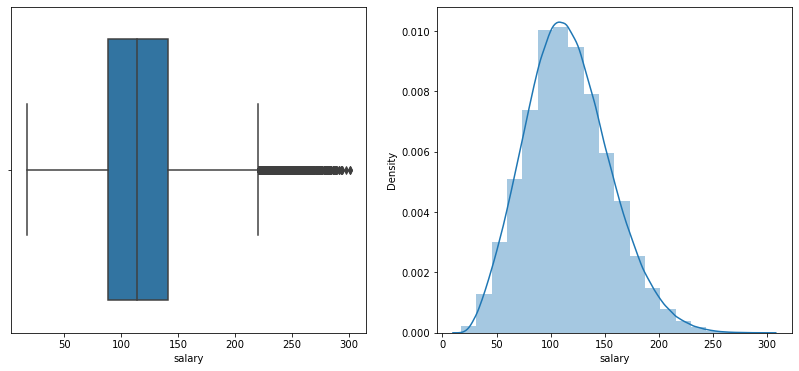

In [27]:
# Distribution of Salary
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

In [28]:
# Calculating the interuartile range
stat = train_df.salary.describe()
print(stat, '\n')
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print(f'The upper and lower bounds for suspected outliers are {upper} and {lower}.')

count    1000000.000000
mean         116.062383
std           38.717084
min           17.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64 

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [29]:
# Checking potential outliers above upper bound
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [30]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [31]:
# Data with zero salaries
train_df[train_df.salary == 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [32]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [33]:
# Checking the frequencies of categorical values job type, industry, degree, major
# this shows how the data is distributed over various categorical variables


In [34]:
# Checking the counts in categorical values job type, industry, degree, major. 
# this shows how the data is distributed over various categorical variables

job_type_counts=train_df["jobType"].value_counts()
print(job_type_counts)

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64


In [35]:
industry_counts=train_df["industry"].value_counts()
print(industry_counts)

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


In [36]:
degree_counts=train_df["degree"].value_counts()
print(degree_counts)

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64


In [37]:
major_counts=train_df["major"].value_counts()
print(major_counts)

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64


From the value counts, we could say that the data present in the Train data set is distributed uniformly and we have enough data(unique values) for each category to analyze and make predictions.

#### ANOVA ( Analysis of Variance)

ANOVA can be used to find the correlation between different groups of a categorical variable.

This test returns two variables :     
           1) F-test score - calculates the ratio of variation between the groups's mean over the variation within each of the                              sample groups
           2) p-value      - shows whether the obtained result is statistically significant

If F-score is small, the correlation between the target variable and the groupings is weak.
If F-score is large, the correlation between the target variable and the groupings is strong.

There is a strong correlation between a categorical variable and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

In [38]:
# Checking the correlation between jobType and salary
df_ANOVA=train_df[["jobType","salary"]]
grouped_anova=df_ANOVA.groupby(["jobType"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('JANITOR')['salary'],grouped_anova.get_group('CTO')['salary'])
print(anova_res_l)

F_onewayResult(statistic=307079.0344412673, pvalue=0.0)


In [39]:
# Checking the correlation between degree and salary
df_ANOVA=train_df[["degree","salary"]]
grouped_anova=df_ANOVA.groupby(["degree"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('HIGH_SCHOOL')['salary'],grouped_anova.get_group('MASTERS')['salary'])
print(anova_res_l)

F_onewayResult(statistic=64199.66438514302, pvalue=0.0)


In [40]:
# Checking the correlation between major and salary
df_ANOVA=train_df[["major","salary"]]
grouped_anova=df_ANOVA.groupby(["major"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('MATH')['salary'],grouped_anova.get_group('PHYSICS')['salary'])
print(anova_res_l)

F_onewayResult(statistic=203.34966671974883, pvalue=4.244798582409627e-46)


In [41]:
# Checking the correlation between industry and salary
df_ANOVA=train_df[["industry","salary"]]
grouped_anova=df_ANOVA.groupby(["industry"])
anova_res_l=stats.f_oneway(grouped_anova.get_group('OIL')['salary'],grouped_anova.get_group('HEALTH')['salary'])
print(anova_res_l)

F_onewayResult(statistic=11627.386949306501, pvalue=0.0)


Using the ANOVA method, we found out that salary is correlated with jobType, industry, degree and major variables. The F-value is large and the p-value close to zero which indicates strong correlation between these groups.

In [42]:
# Get information on all the columns of the final dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 108.5+ MB


In [43]:
# Summarize each feature variable(categorical)
train_df[['jobType','industry','degree','major']].describe(include='all')

,jobType,industry,degree,major
count,1000000,1000000,1000000,1000000
unique,8,7,5,9
top,SENIOR,WEB,HIGH_SCHOOL,NONE
freq,125886,143206,236976,532355


We have 8 different values in Job Type, 7 different values in Industry, 5 unique values in Degree and 9 different values in Major category.

In [44]:
# Summarizing the feature variable(numerical)
train_df[['yearsExperience','milesFromMetropolis']].describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


From the statistical summary, the range of the column Experience lies between [0 to 24] and the distance from the metropolitan city lies between [0 to 99].

In [45]:
# Summarizing the target variable (Salary)
train_df['salary'].describe()

count    1000000.000000
mean         116.062383
std           38.717084
min           17.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

From the statistical summary, mean salary is 116. The minimum salary earned is 17 and the maximum is 301.

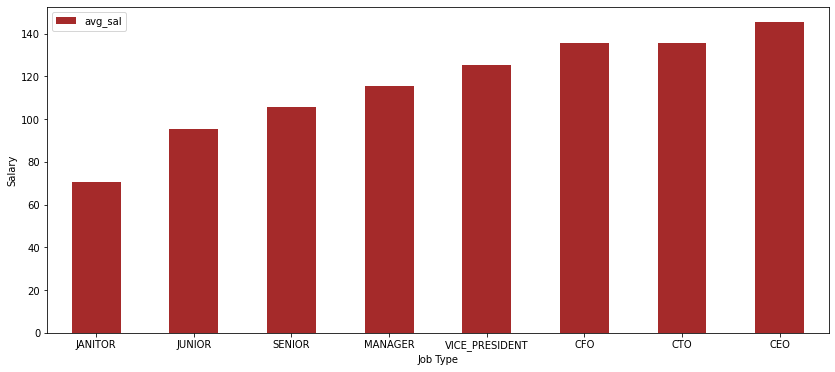

In [46]:
# How target variable 'salary' varies on the feature variable 'jobType'
grp = train_df.groupby('jobType')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot.bar(rot=0, fontsize=10,figsize=(14,6),sort_columns=True, color='brown')
ax.set_xlabel("Job Type")
ax.set_ylabel("Salary")
plt.show()

The average salary by job type is lowest for the jobType "Janitor" and highest for "CEO". Job Designation "CEO" has the highest salary.

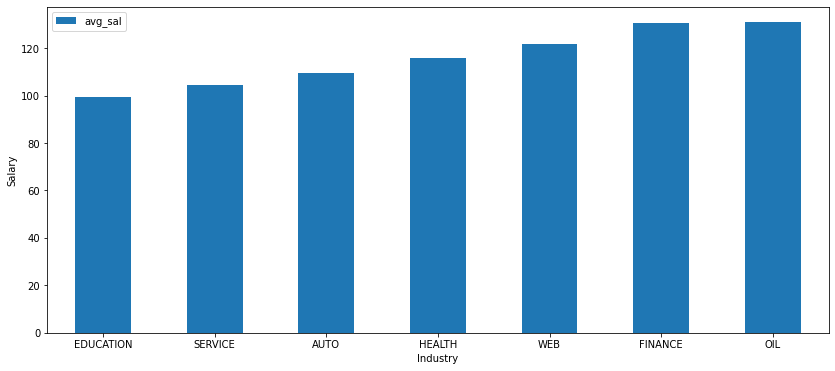

In [47]:
# How target variable 'salary' varies on the feature variable 'industry'
grp = train_df.groupby('industry')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot.bar(rot=0, fontsize=10,figsize=(14,6))
ax.set_xlabel("Industry")
ax.set_ylabel("Salary")
plt.show()

From the above bar plot, we can deduce that "Finance" and "Oil" industry have higher salaries than others.

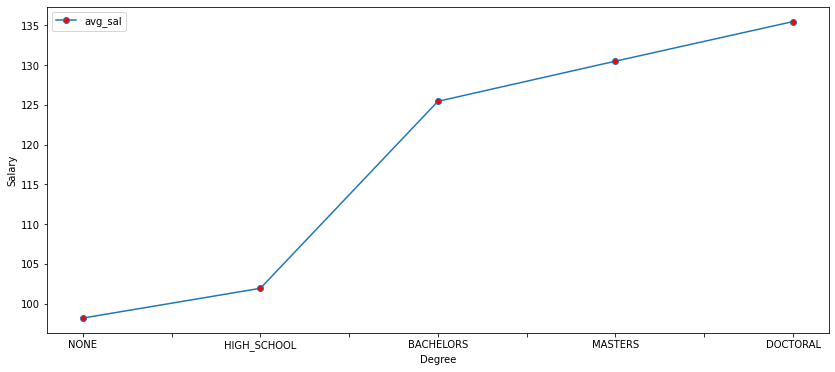

In [48]:
# How target variable 'salary' varies on the feature variable 'degree'
grp = train_df.groupby('degree')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot(rot=0, fontsize=10,figsize=(14,6),marker='o',markerfacecolor='red')
ax.set_xlabel("Degree")
ax.set_ylabel("Salary")
plt.show()

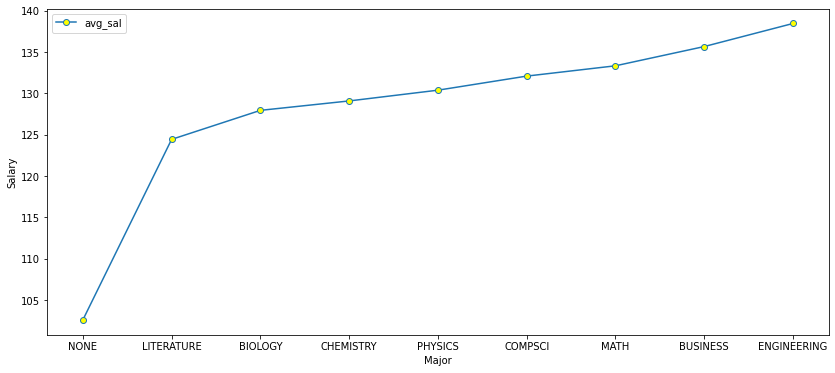

In [49]:
# How target variable 'salary' varies on the feature variable 'major'
grp = train_df.groupby('major')['salary'].agg(avg_sal=(np.mean))
grp_df = pd.DataFrame(grp)
grp_df=grp_df.sort_values(by='avg_sal')
ax=grp_df.plot(rot=0, fontsize=10,figsize=(14,6),marker='o',markerfacecolor='yellow')
ax.set_xlabel("Major")
ax.set_ylabel("Salary")
plt.show()

Wee see how the salary depends on various feature variables "major" and "degree". Salaries were low for those having no degree in the category degree. Salaries were low for those who have no major in the category major. People with educational background of Masters and Doctoral will have higher salaries as compared to jobs having No degree 'None' or "High School".

### ---- 4 Explore the data (EDA) ----

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [37]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [38]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [39]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data